### K-fold
- 사용 이유 : 총 데이터 개수가 적은 데이터 셋에 대하여 정확도 향상
- 데이터 수가 적은데 검증과 테스트에 데이터를 할당하면 underfitting 등 성능이 미달되는 모델 학습

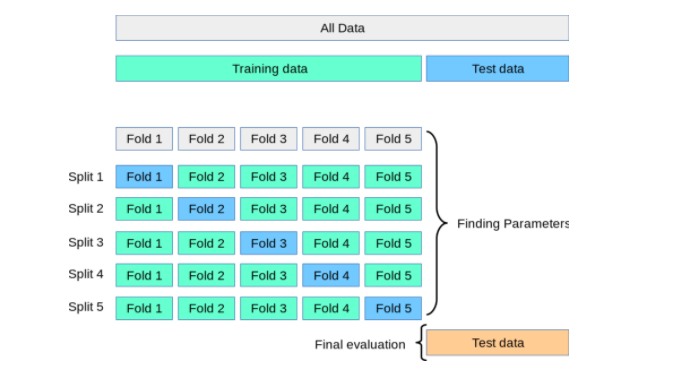

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('./data/iris.csv')
df

In [ ]:
X = df.iloc[:, 1:-1]
Y = df.iloc[:, -1]

In [ ]:
# K-Fold 교차 검증
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

model = LogisticRegression(max_iter=200)

fold_accuracies = []

for train_index, test_index in kfold.split(X):
    
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    fold_accuracies.append(accuracy)
    

In [ ]:
for i, accuracy in enumerate(fold_accuracies, 1):
    print(f"Fold {i} Accuracy: {accuracy}")

mean_accuracy = np.mean(fold_accuracies)
print(f"\nMean Cross-Validation Accuracy: {mean_accuracy}")